# Predicting Heart Disease using Machine Learning Model
This notebook looks into using various Python based Machine Learning and Data Science libraries
in an attempt to build a machine learning model capable f predicting heart disease based on medical attributes of peopl.

We are going to take the following approach:
1. Problem Defination 
2. Data
3. Evaluation - what is sucess for us?
4. Features
5. Modeling 
6. Experimentation

## 1. Problem Statement

In a statement, 
> Given clinical parameters about a patient, can we predict if they have heart disease or not? 

## 2. Data
Cleaveland Database from UCI Heart Disease Dataset
- https://archive.ics.uci.edu/dataset/45/heart+disease

A version is also valiable on Kaggle
- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Data Dictionary 
* age: The person’s age in years
* sex: The person’s sex (1 = male, 0 = female)
* cp: chest pain type
    - Value 0: asymptomatic
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: typical angina
* trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
* chol: The person’s cholesterol measurement in mg/dl
* fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person’s maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment — 
    - 0: downsloping; 1: flat; 2: upsloping

* ca: The number of major vessels (0–3)
* thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
* target: Heart disease (1 = no, 0= yes)

## 3. Evaluation
We want to be very very accurate - we are dealing with hearth care problem. 
> So if we can reach 95% accuracy at predicting whether or not a patient has heart disese during the proof of concept, we will pursue the project. 


## 4. Features

This is where you get different information about each of the features of your data. 

- id (Unique id for each patient)
- age (Age of the patient in years)
- origin (place of study)
- **sex** (Male/Female)
- **cp chest pain type** ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
- chol (serum cholesterol in mg/dl)
- fbs (if fasting blood sugar > 120 mg/dl)
- restecg (resting electrocardiographic results)
- **Values**: [normal, stt abnormality, lv hypertrophy]
- thalach: maximum heart rate achieved
- **exang**: exercise-induced angina (True/ False)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by fluoroscopy
- thal: [normal; fixed defect; reversible defect]

<img src = './../images/ml101-steps-to-take-in-a-machine-learning-project.png'>

### Preparing the tools 
Import all tools that we need.

In [1]:
# Import all the tools we need (industry standard to do import at one place)

# EDA imports
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# imoport models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


#we may need more imports 
pd.__version__,np.__version__, sklearn.__version__

/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


('2.0.3', '1.25.1', '1.3.0')

## Load the data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration - (EDA)
- No set way of doing this, but the goal is to become a SME on the dataset. A bare minimum checklist is below-

1. What question(s) are you trying to solve?
2. What kind of data do we have how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them? 
5. How can you add, change or remove features to get more out of your data? 

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<Axes: xlabel='target'>

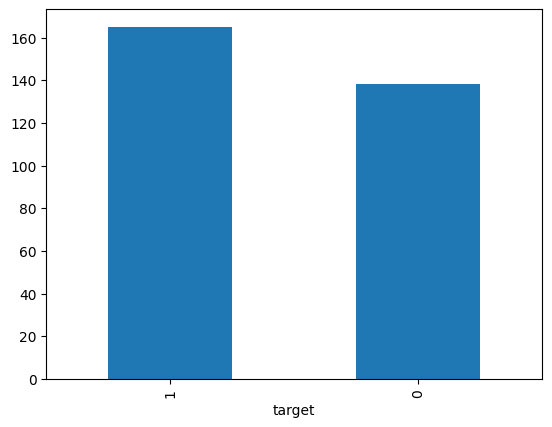

In [6]:
# How many classes are there? 
df['target'].value_counts().plot.bar()
# relatively balanced classification problem

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# there are no missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


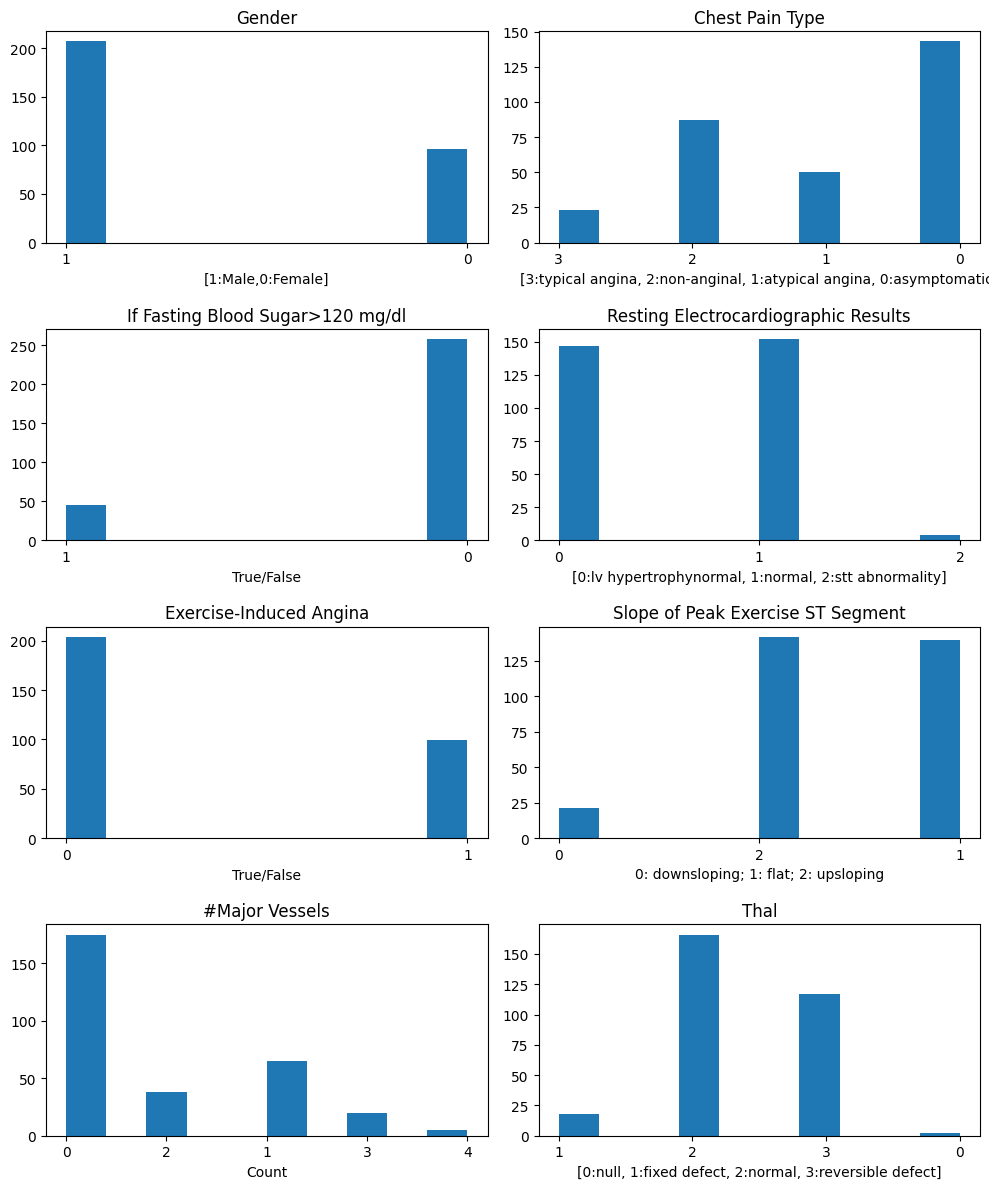

In [10]:
# Plotting all categorial values

fig, ax = plt.subplots(nrows=4,ncols=2,figsize=(10,12))

#plot to each different way 
ax[0,0].hist(df.sex.astype('string'))
ax[0,0].set(title = 'Gender',
           xlabel = '[1:Male,0:Female]')


ax[0,1].hist(df.cp.astype('string'))
ax[0,1].set(title = 'Chest Pain Type',
           xlabel='[3:typical angina, 2:non-anginal, 1:atypical angina, 0:asymptomatic]')

ax[1,0].hist(df.fbs.astype('string'))
ax[1,0].set(title = 'If Fasting Blood Sugar>120 mg/dl',
           xlabel='True/False')

ax[1,1].hist(df.restecg.astype('string'))
ax[1,1].set(title = 'Resting Electrocardiographic Results',
           xlabel='[0:lv hypertrophynormal, 1:normal, 2:stt abnormality]')

ax[2,0].hist(df.exang.astype('string'))
ax[2,0].set(title = 'Exercise-Induced Angina',
           xlabel='True/False')

ax[2,1].hist(df.slope.astype('string'))
ax[2,1].set(title = 'Slope of Peak Exercise ST Segment',
           xlabel='0: downsloping; 1: flat; 2: upsloping')


ax[3,0].hist(df.ca.astype('string'))
ax[3,0].set(title = '#Major Vessels',
            xlabel='Count')


ax[3,1].hist(df.thal.astype('string'));
ax[3,1].set(title = 'Thal',
            xlabel='[0:null, 1:fixed defect, 2:normal, 3:reversible defect]');

#Adjust the padding between and around subplots.
fig.tight_layout(h_pad=1.5)


In [11]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

#### Heart disease frequency according to sex 

In [12]:
### Finding patterns 

# compare target and sex 

pd.crosstab(df.target,df.sex)

# ~70% of the women has heart disease in the dataset
# ~50% of the men has heart disease in the dataaset 
# ~60% of the population has heart disease in the dataset 

sex,0,1
target,,
0,24,114
1,72,93


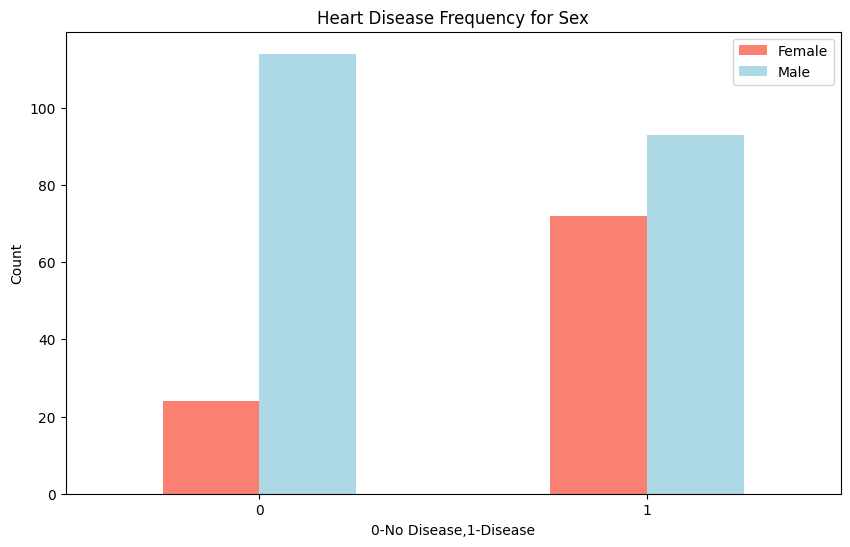

In [13]:
# create a plot of the cross tab

pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0-No Disease,1-Disease')
plt.ylabel('Count')
plt.legend(['Female','Male']);
plt.xticks(rotation=0);

In [14]:
## Compare a bunch of columns together and them compare it with the target

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Age vs. max heart rate for heart disease 

''

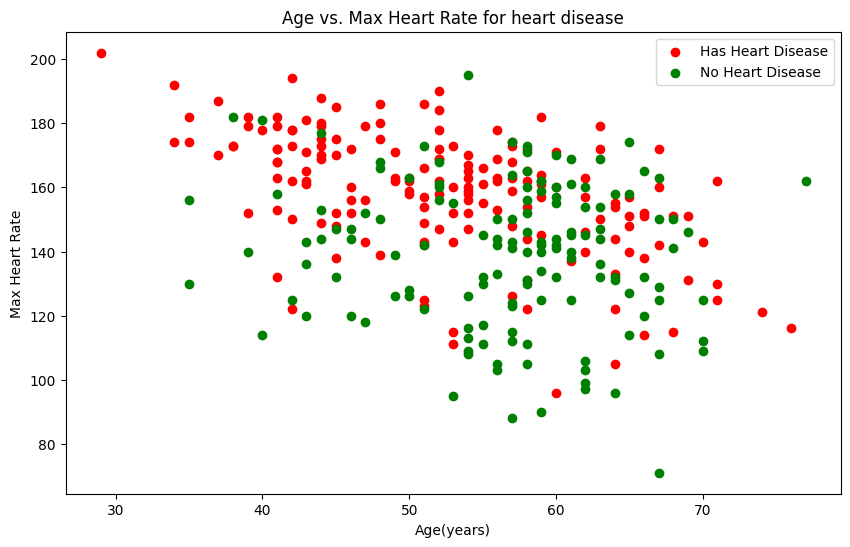

In [15]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
            c='red'
           )

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
            c='green'
           )

plt.title('Age vs. Max Heart Rate for heart disease')
plt.xlabel('Age(years)')
plt.ylabel('Max Heart Rate')
plt.legend(['Has Heart Disease','No Heart Disease']);

;

# only a downward trend, between age and the max heart rate 

Text(0.5, 0, 'Age(years)')

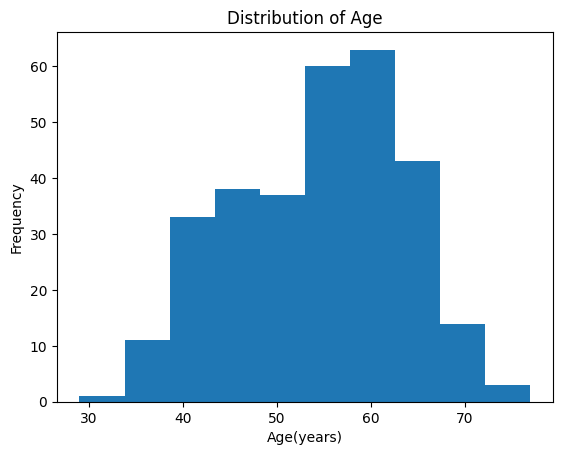

In [16]:
# check the distribution of age 
df.age.plot.hist();
plt.title('Distribution of Age')
plt.xlabel('Age(years)')

# skewed towards the right - majority of the folks are in 50-60 years range

#### Cheast pain vs. Heart Disease 

cp: chest pain type
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

In [17]:
pd.crosstab(df.cp,df.target)

#  non-anginal pain — has max percentage of heart disease ??? 

# atypical angina- seems related

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


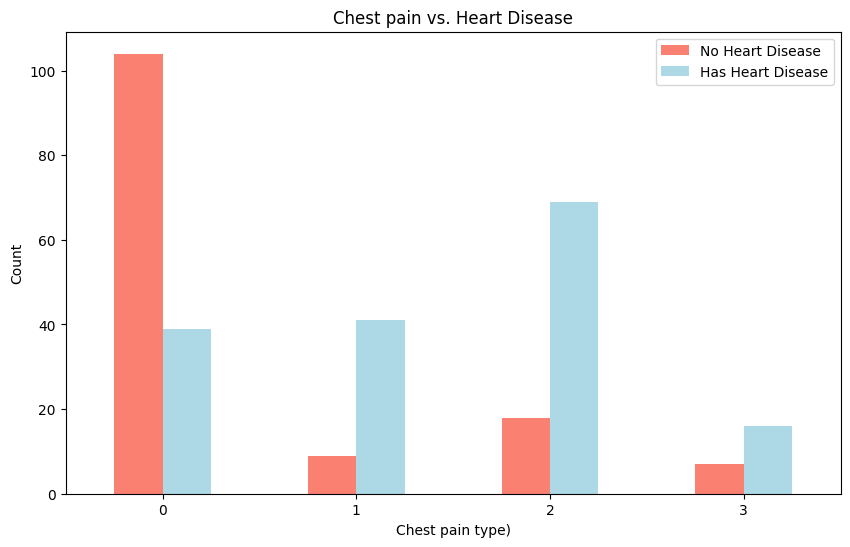

In [18]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                 figsize=(10,6),
                                 color=['salmon','lightblue'])

plt.title('Chest pain vs. Heart Disease')
plt.xlabel('Chest pain type)')
plt.ylabel('Count')
plt.legend(['No Heart Disease','Has Heart Disease']);
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
#### Building a corelation martrix

df.corr()
# hard to look at!

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


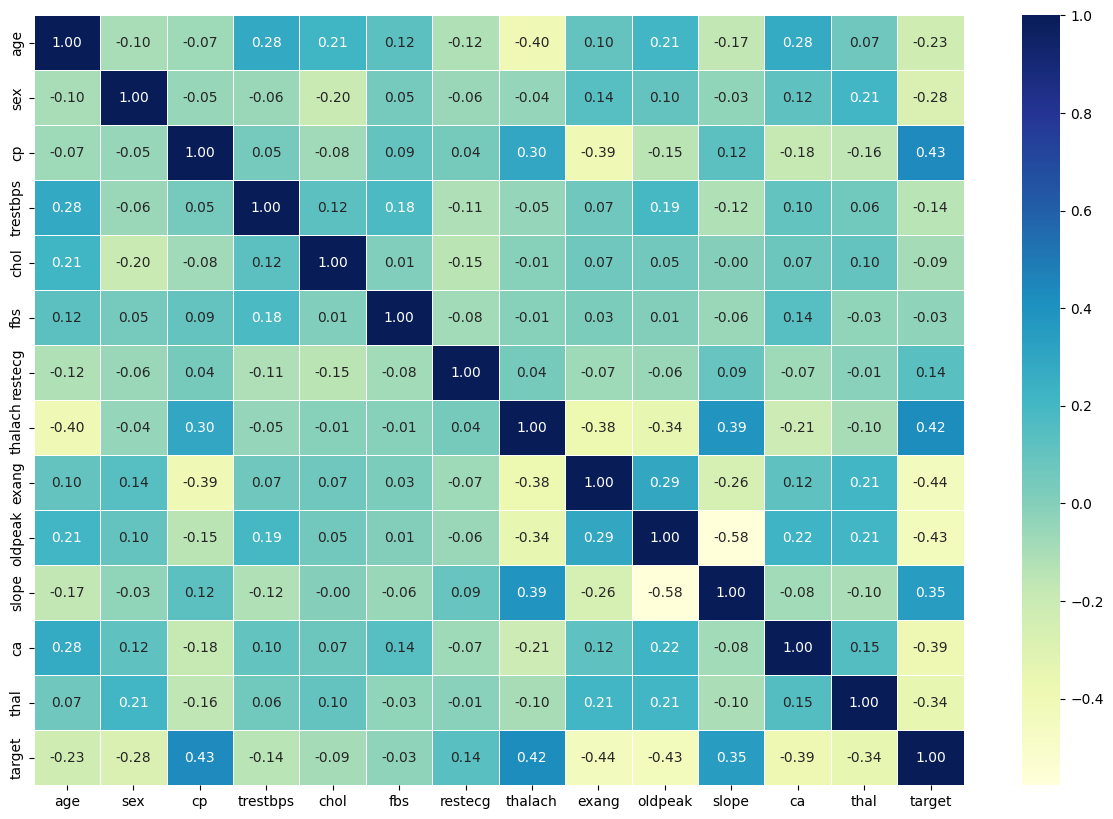

In [21]:
# making the corelation matrix a visual

corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                 linewidths=0.5,
                 fmt='0.2f',
                 cmap='YlGnBu'
                 );

#bottom,top = ax.get_ylim()
#ax.set_ylim(bottom+0.5,top-0.5);

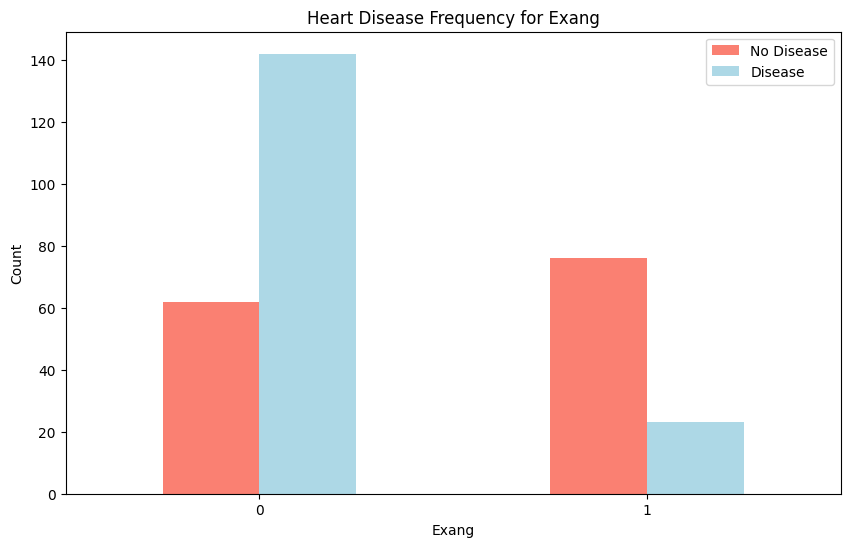

In [22]:
# heart disease with angina

pd.crosstab(df.exang,df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);
plt.title('Heart Disease Frequency for Exang')
plt.xlabel('Exang')
plt.ylabel('Count')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [23]:
pd.crosstab(df.exang,df.target)

target,0,1
exang,,
0,62,142
1,76,23


We can go on and on doing the EDA

### Modelling
- Modeling driven EDA 

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
np.random.seed(42)

# split the data
x = df.drop('target',axis=1)
y = df['target']


# create train and test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

Create the model.

What model should we use? 

<img src='./../images/sklearn-ml-map.png'>

We are going to start 3 models-
1. Logistic Regression
2. K-Nearest Neighbor
3. Random Forest Classification 

#### Put model in a disctionary

In [28]:
models = {'Logistic Regression':LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#create a funcutin for fit and score
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fit and evaluate machine learning models
    Models: a dict of machine learning models
    x_train - training data
    x_test - test data
    y_train - training labels
    y_test - test labels
    """
    #set random seed
    np.random.seed(42)
    # make a dict for model score
    model_scores = {}
    #loop the model
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate the model and append the score to model_score
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [37]:
# fit the score the models
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

print('baseline scores')
model_scores

baseline scores


/Users/abhinav/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

#### Model comparision 

<Axes: >

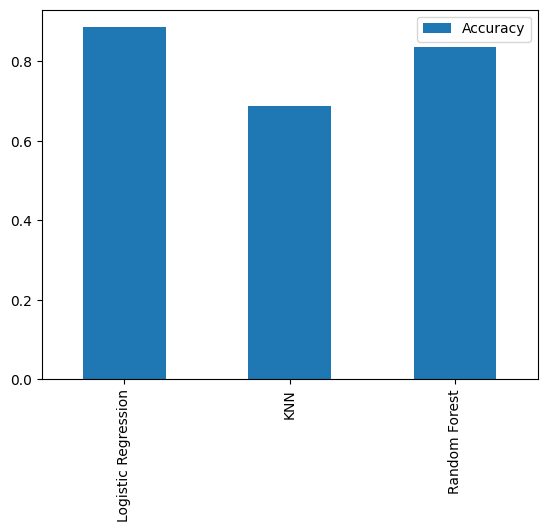

In [39]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar()

# say good by to KNN

#### Model Tunning

We have the baseline model - Next we tune our model.

Let's look at the following-
* Hyperparameter tunning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Recall
* Classification Report
* ROC Curve
* Area under the Curve (AUC)

### Hyperparameter Tunning(By hand)

In [46]:
# Let's tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbors

neighbors = range(1,21)
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neigbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algo
    knn.fit(x_train,y_train)
    
    #update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #udpate the test score list
    test_scores.append(knn.score(x_test,y_test))

In [58]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [48]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%
The best value is at n_neighbor = 11


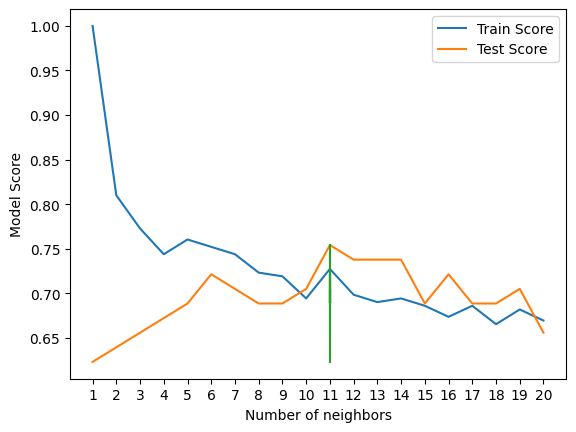

In [67]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1)) 
plt.plot([11]*20,test_scores) # best value at n_neighbor = 11
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f'Max KNN score on the test data: {max(test_scores)*100:0.2f}%')
print(f'The best value is at n_neighbor = 11')

# The accuracy is way lower than target of 95% so we drop KNN.

## Hyperparameter Tunning- RandomizedSearchCV

Tune
* LogisticRegression 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* RandomForestClassifier

..using RandomizedSearchSCV

In [78]:
# Create a hyper parameter grid for logistic regresion
# (picking these parameter from the documentation & research)
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

rf_grid = {'n_estimators':np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [79]:
# Tune logistic Regression

np.random.seed(42)

# setup random hyperparameter search for the logistic regression  
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)

# fit random hyperparameter search model for the logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [81]:
rs_log_reg.score(x_test,y_test)
# this is the same as before

0.8852459016393442

Now we have tunned logsitics regression, let's do the same for the Random Forest Classifier

In [82]:
np.random.seed(42)

# setup random parameters for Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [83]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [85]:
rs_rf.score(x_test,y_test)
# imporved from 83% to 86%

0.8688524590163934

In [88]:
#base line model
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tunning - GridSearchSV

Since our Linear Logistic model provides the best scores so far, we will try and improve it again with GridSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [92]:
#different HP grid for our Logistic Regression model

log_reg_grid = {'C':np.logspace(-4,4,30),
               "solver":['liblinear']}

# setup grid HP search for Logistics Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid HP search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [93]:
#check the best HPs
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [95]:
gs_log_reg.score(x_test,y_test)
# this again same, baseline, RandomizedSearchCV and GridSearchCV

0.8852459016393442

In [97]:
#baseline scores
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

We are going to stick to this Logistics Regression Model for now. 